<a href="https://colab.research.google.com/github/SyedSihabUsSakib/Thesis/blob/master/RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming your dataset is stored in X (input features) and y (class labels)
import pandas as pd

# Load the CSV file
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset.csv')

# Assuming your text data is stored in the 'text' column and the class labels are in the 'label' column
X = data['text'].values
y = data['label'].values

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)

# Create a CountVectorizer object to convert text data into numerical features
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform the training and testing data
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=95)

# Train the classifier
clf.fit(X_train, y_train)

# Predict the class labels for the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))


               precision    recall  f1-score   support

   Cy-Flaming       0.44      0.58      0.50       119
Cy-Pull-a-Pig       0.52      0.60      0.56        88
    Cy-Racism       0.65      0.56      0.60       133
    Cy-Threat       0.50      0.53      0.52        96
 Not Bullying       0.82      0.55      0.66       115

     accuracy                           0.56       551
    macro avg       0.59      0.57      0.57       551
 weighted avg       0.59      0.56      0.57       551



#Confusion Matrix

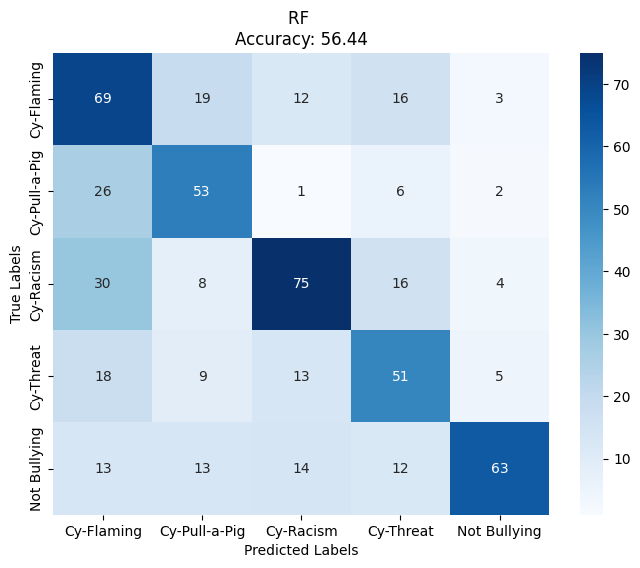

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the class names
class_names = clf.classes_

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('RF \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, y_pred)*100))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#ROC

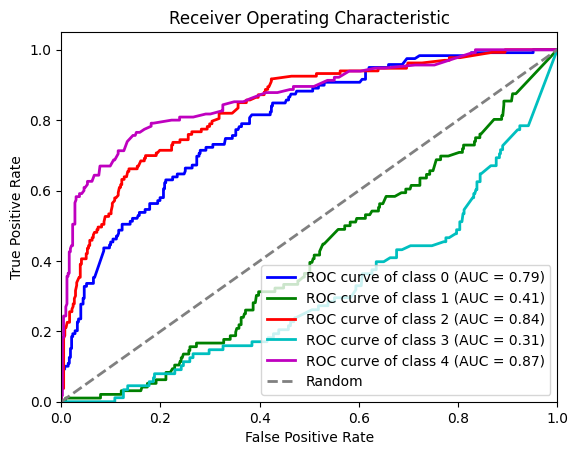

In [5]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Convert the class labels to one-hot encoded format
y_test_one_hot = label_binarize(y_test, classes=['Cy-Flaming', 'Cy-Threat', 'Cy-Racism', 'Cy-Pull-a-Pig', 'Not Bullying'])  # Replace [0, 1, 2, 3, 4] with your class labels

# Get the predicted probabilities for each class
y_pred_prob = clf.predict_proba(X_test)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure()
colors = ['b', 'g', 'r', 'c', 'm']
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (AUC = {1:.2f})'.format(i, roc_auc[i]))

# Plot the random guessing curve
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
